🎯 HR Analytics - Exploratory Data Analysis

📥 Loading cleaned data...
✅ Loaded: 1500 employees, 518 exit interviews

📊 Overall Attrition Overview:
Total Employees: 1,500
Employees Left: 518
Attrition Rate: 34.5%

👥 Demographic Analysis:


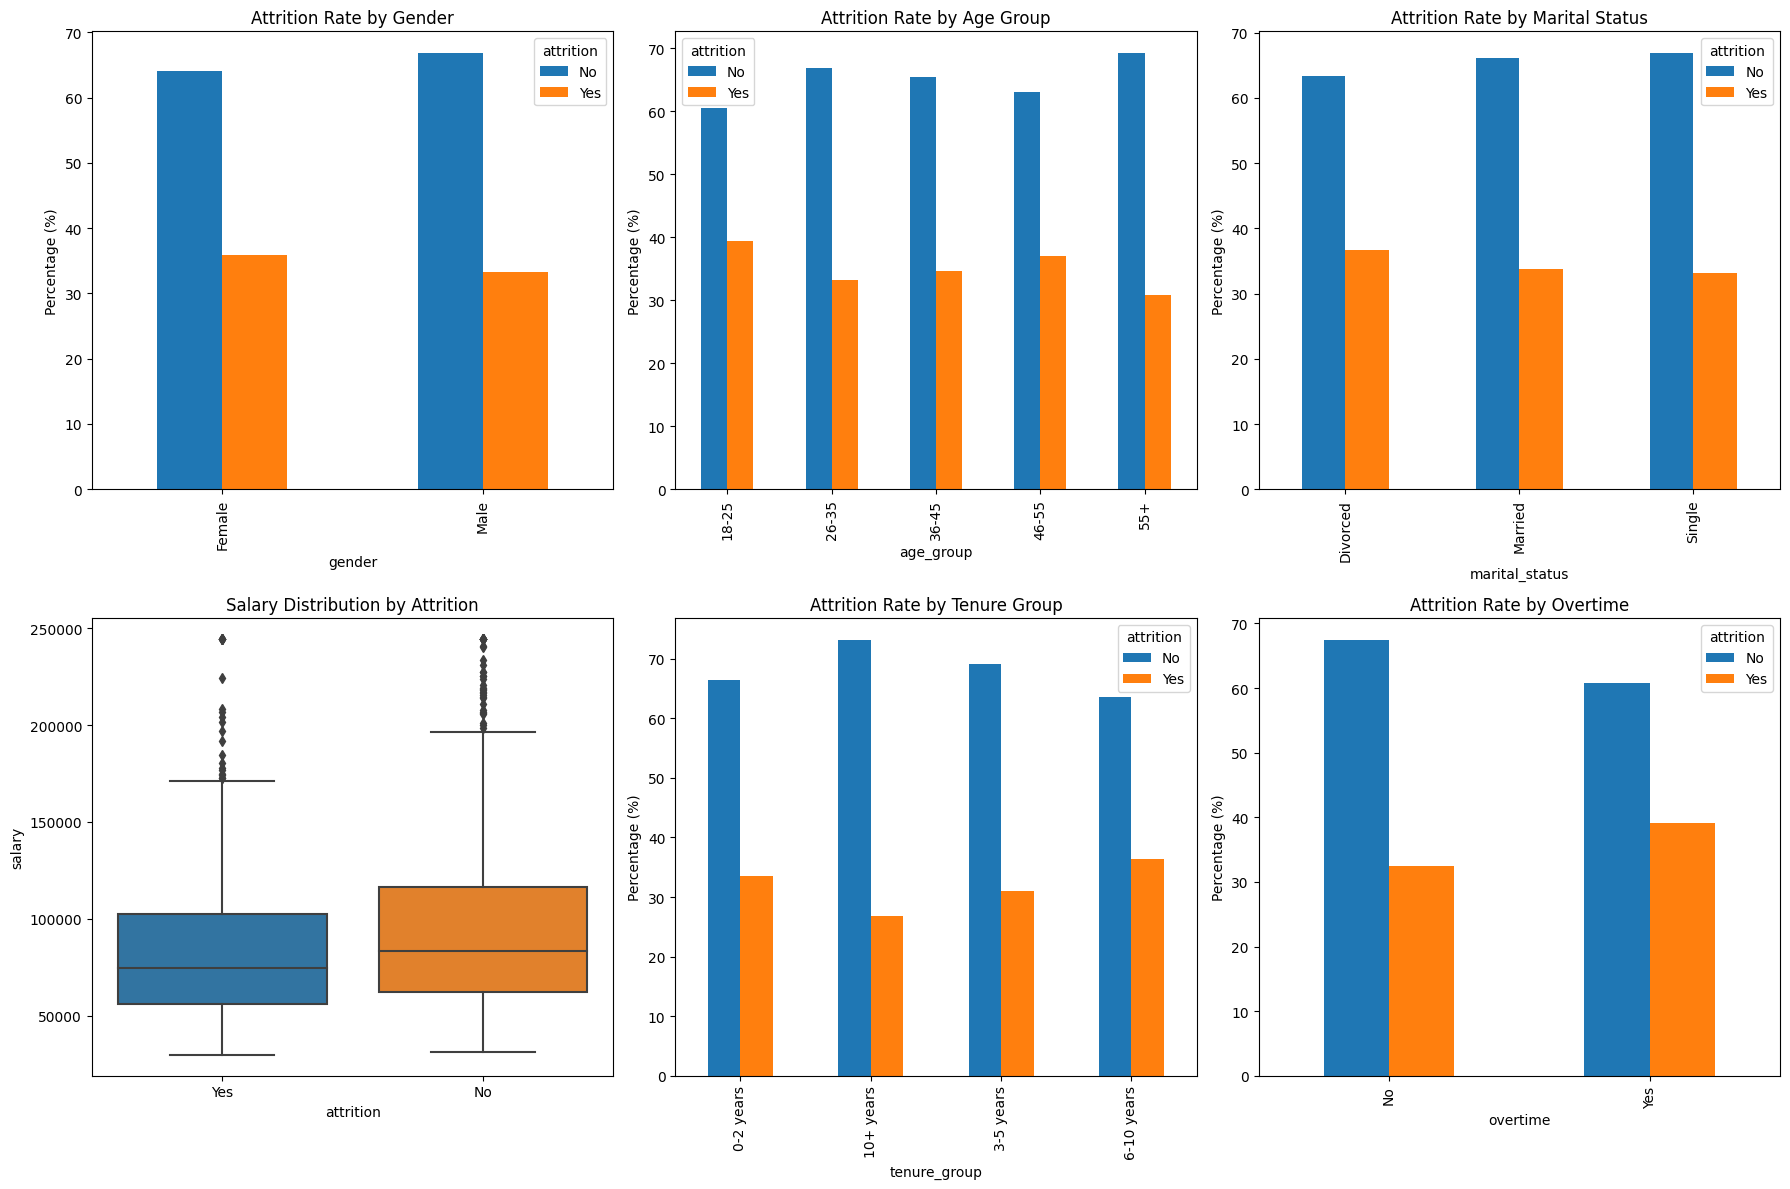


💼 Job-Related Factors Analysis:
Department Analysis:
                  attrition     salary  job_satisfaction
department                                              
Customer Service      40.61   61612.28              3.09
Finance               26.23  108487.33              3.07
HR                    36.36   90830.48              2.95
Marketing             33.92   91234.08              2.83
Operations            36.56   72146.78              2.75
R&D                   31.94   88567.26              2.98
Sales                 35.93   97034.18              3.08
Technology            34.30  116889.50              2.90


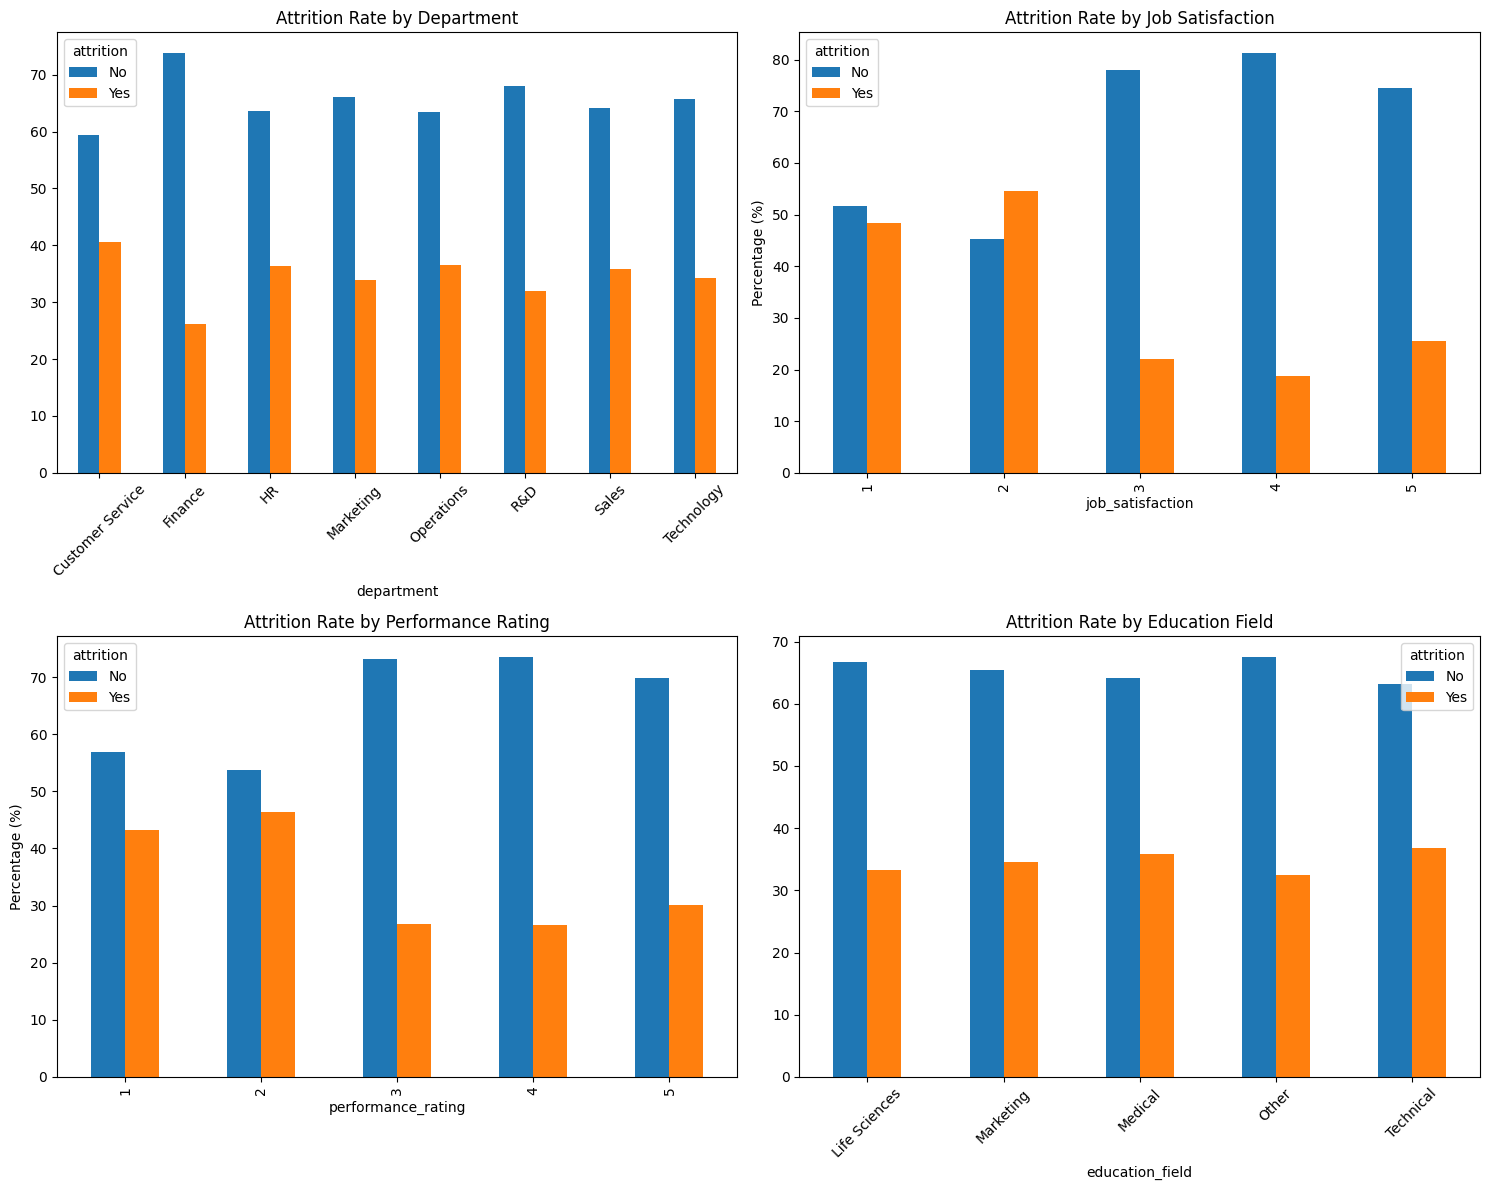


🔗 Correlation Analysis:


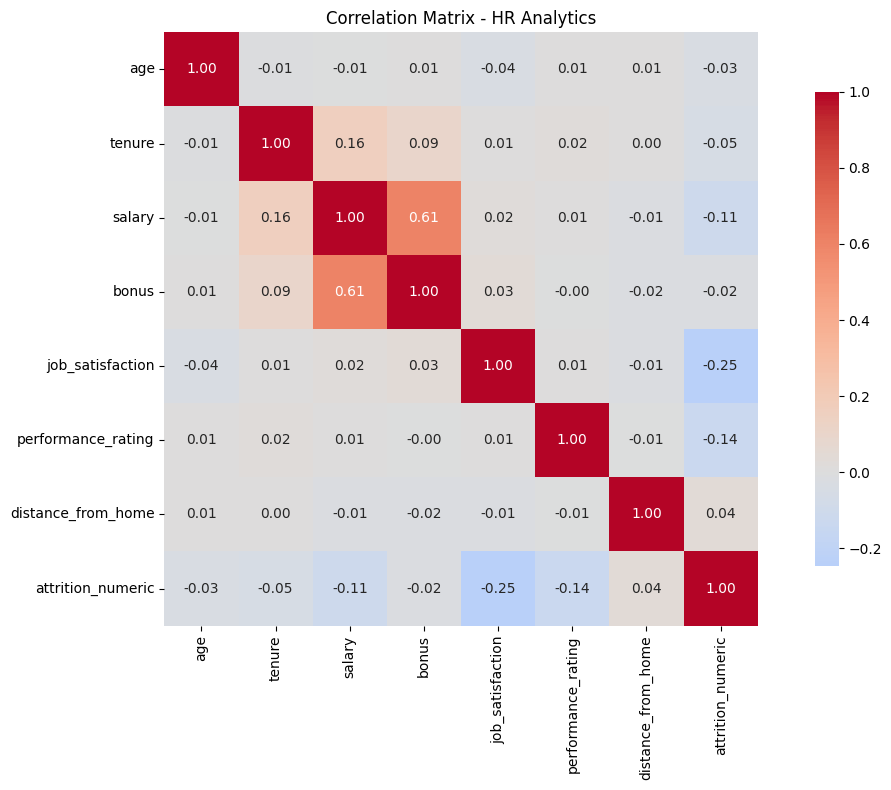


🎤 Exit Interview Analysis:


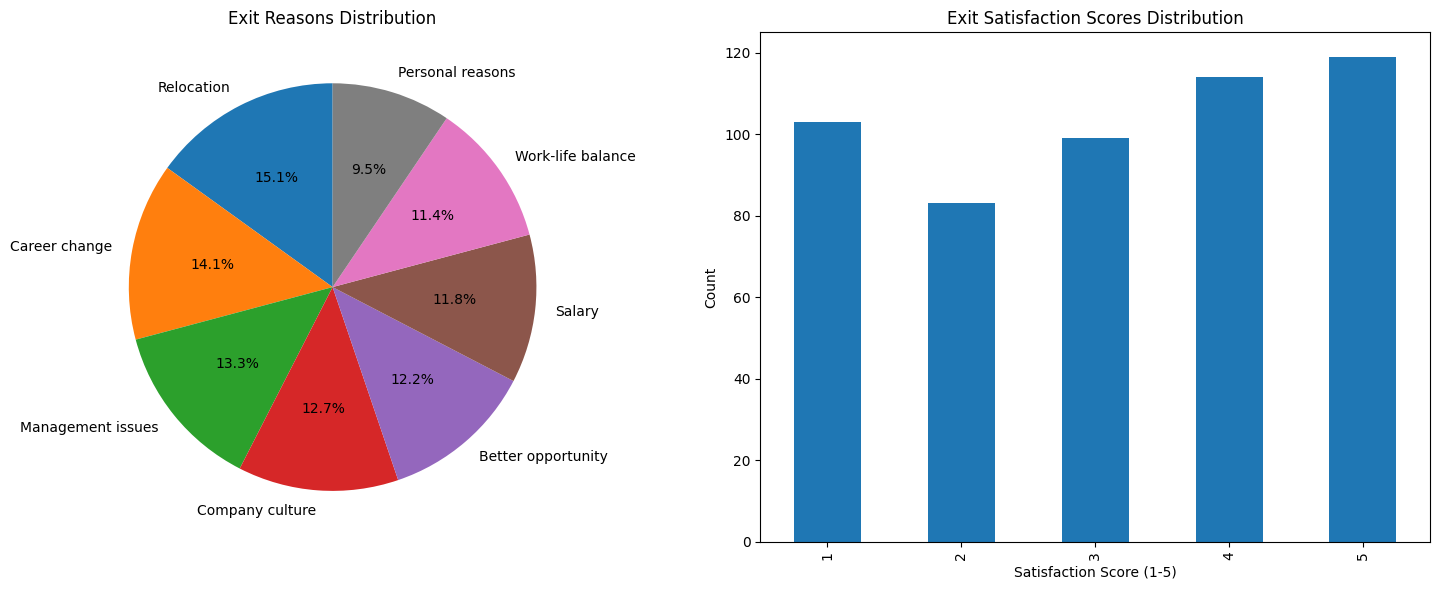


Exit Reasons Summary:
reason
Relocation            78
Career change         73
Management issues     69
Company culture       66
Better opportunity    63
Salary                61
Work-life balance     59
Personal reasons      49
Name: count, dtype: int64

💡 Key Insights Summary:
1. Overall Attrition Rate: 34.5%
2. Highest attrition in Customer Service: 40.6%
3. Salary difference (Stayed vs Left): $10,227
4. Overtime impact on attrition: +6.7%
5. Job satisfaction impact: 48.3% (sat=1) vs 18.8% (sat=4)

🎉 EDA completed successfully!

📚 Next steps:
1. Run 03_attrition_analysis.ipynb for predictive modeling
2. Review insights for business recommendations
3. Build interactive dashboard


In [3]:
# HR Analytics - Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os

warnings.filterwarnings("ignore")

# Add shared modules to path
import sys

# Ensure plots output directory exists
plots_dir = "../dashboards/plots"
os.makedirs(plots_dir, exist_ok=True)

# sys.path.append("../../shared")
# from shared.utils.helpers import setup_plotting

# # Setup plotting style
# setup_plotting()

print("🎯 HR Analytics - Exploratory Data Analysis")
print("=" * 60)

# Load cleaned data
print("\n📥 Loading cleaned data...")

employees = pd.read_csv("../../data/processed/employees_clean.csv")
exit_interviews = pd.read_csv("../../data/processed/exit_interviews_clean.csv")

print(f"✅ Loaded: {len(employees)} employees, {len(exit_interviews)} exit interviews")

# Overall Attrition Overview
print("\n📊 Overall Attrition Overview:")
print("=" * 50)

attrition_count = (employees["attrition"] == "Yes").sum()
attrition_rate = (attrition_count / len(employees)) * 100

print(f"Total Employees: {len(employees):,}")
print(f"Employees Left: {attrition_count:,}")
print(f"Attrition Rate: {attrition_rate:.1f}%")

# Demographic Analysis
print("\n👥 Demographic Analysis:")
print("=" * 40)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Attrition by Gender
gender_attrition = (
    pd.crosstab(employees["gender"], employees["attrition"], normalize="index") * 100
)
gender_attrition.plot(kind="bar", ax=axes[0, 0])
axes[0, 0].set_title("Attrition Rate by Gender")
axes[0, 0].set_ylabel("Percentage (%)")

# 2. Attrition by Age Group
age_attrition = (
    pd.crosstab(employees["age_group"], employees["attrition"], normalize="index") * 100
)
age_attrition.plot(kind="bar", ax=axes[0, 1])
axes[0, 1].set_title("Attrition Rate by Age Group")
axes[0, 1].set_ylabel("Percentage (%)")

# 3. Attrition by Marital Status
marital_attrition = (
    pd.crosstab(employees["marital_status"], employees["attrition"], normalize="index")
    * 100
)
marital_attrition.plot(kind="bar", ax=axes[0, 2])
axes[0, 2].set_title("Attrition Rate by Marital Status")
axes[0, 2].set_ylabel("Percentage (%)")

# 4. Salary vs Attrition
sns.boxplot(data=employees, x="attrition", y="salary", ax=axes[1, 0])
axes[1, 0].set_title("Salary Distribution by Attrition")

# 5. Tenure vs Attrition
tenure_attrition = (
    pd.crosstab(employees["tenure_group"], employees["attrition"], normalize="index")
    * 100
)
tenure_attrition.plot(kind="bar", ax=axes[1, 1])
axes[1, 1].set_title("Attrition Rate by Tenure Group")
axes[1, 1].set_ylabel("Percentage (%)")

# 6. Overtime vs Attrition
overtime_attrition = (
    pd.crosstab(employees["overtime"], employees["attrition"], normalize="index") * 100
)
overtime_attrition.plot(kind="bar", ax=axes[1, 2])
axes[1, 2].set_title("Attrition Rate by Overtime")
axes[1, 2].set_ylabel("Percentage (%)")

plt.tight_layout()
plt.savefig(
    "../dashboards/plots/demographic_analysis.png", dpi=300, bbox_inches="tight"
)
plt.show()

# Job-Related Factors
print("\n💼 Job-Related Factors Analysis:")
print("=" * 45)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Department Analysis
dept_analysis = (
    employees.groupby("department")
    .agg(
        {
            "attrition": lambda x: (x == "Yes").mean() * 100,
            "salary": "mean",
            "job_satisfaction": "mean",
        }
    )
    .round(2)
)

print("Department Analysis:")
print(dept_analysis)

dept_attrition = (
    pd.crosstab(employees["department"], employees["attrition"], normalize="index")
    * 100
)
dept_attrition.plot(kind="bar", ax=axes[0, 0])
axes[0, 0].set_title("Attrition Rate by Department")
axes[0, 0].tick_params(axis="x", rotation=45)

# 2. Job Satisfaction
satisfaction_attrition = (
    pd.crosstab(
        employees["job_satisfaction"], employees["attrition"], normalize="index"
    )
    * 100
)
satisfaction_attrition.plot(kind="bar", ax=axes[0, 1])
axes[0, 1].set_title("Attrition Rate by Job Satisfaction")
axes[0, 1].set_ylabel("Percentage (%)")

# 3. Performance Rating
performance_attrition = (
    pd.crosstab(
        employees["performance_rating"], employees["attrition"], normalize="index"
    )
    * 100
)
performance_attrition.plot(kind="bar", ax=axes[1, 0])
axes[1, 0].set_title("Attrition Rate by Performance Rating")
axes[1, 0].set_ylabel("Percentage (%)")

# 4. Education Field
education_attrition = (
    pd.crosstab(employees["education_field"], employees["attrition"], normalize="index")
    * 100
)
education_attrition.plot(kind="bar", ax=axes[1, 1])
axes[1, 1].set_title("Attrition Rate by Education Field")
axes[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.savefig(
    "../dashboards/plots/job_factors_analysis.png", dpi=300, bbox_inches="tight"
)
plt.show()

# Correlation Analysis
print("\n🔗 Correlation Analysis:")
print("=" * 40)

# Prepare numeric data for correlation
numeric_columns = [
    "age",
    "tenure",
    "salary",
    "bonus",
    "job_satisfaction",
    "performance_rating",
    "distance_from_home",
]
employees_numeric = employees[numeric_columns].copy()
employees_numeric["attrition_numeric"] = (employees["attrition"] == "Yes").astype(int)

# Calculate correlation matrix
correlation_matrix = employees_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix - HR Analytics")
plt.tight_layout()
plt.savefig("../dashboards/plots/correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

# Exit Interview Analysis
print("\n🎤 Exit Interview Analysis:")
print("=" * 40)

if len(exit_interviews) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Exit reasons
    exit_reasons = exit_interviews["reason"].value_counts()
    axes[0].pie(
        exit_reasons.values, labels=exit_reasons.index, autopct="%1.1f%%", startangle=90
    )
    axes[0].set_title("Exit Reasons Distribution")

    # Satisfaction scores
    satisfaction_dist = (
        exit_interviews["satisfaction_score"].value_counts().sort_index()
    )
    satisfaction_dist.plot(kind="bar", ax=axes[1])
    axes[1].set_title("Exit Satisfaction Scores Distribution")
    axes[1].set_xlabel("Satisfaction Score (1-5)")
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.savefig(
        "../dashboards/plots/exit_interview_analysis.png", dpi=300, bbox_inches="tight"
    )
    plt.show()

    print("\nExit Reasons Summary:")
    print(exit_reasons)

# Key Insights Summary
print("\n💡 Key Insights Summary:")
print("=" * 50)

# Top 5 insights
print("1. Overall Attrition Rate:", f"{attrition_rate:.1f}%")

# Highest attrition department
highest_attrition_dept = dept_analysis["attrition"].idxmax()
highest_attrition_rate = dept_analysis["attrition"].max()
print(
    f"2. Highest attrition in {highest_attrition_dept}: {highest_attrition_rate:.1f}%"
)

# Salary difference
salary_attrition = employees.groupby("attrition")["salary"].mean()
salary_diff = salary_attrition["No"] - salary_attrition["Yes"]
print(f"3. Salary difference (Stayed vs Left): ${salary_diff:,.0f}")

# Overtime impact
overtime_impact = (
    overtime_attrition.loc["Yes", "Yes"] - overtime_attrition.loc["No", "Yes"]
)
print(f"4. Overtime impact on attrition: +{overtime_impact:.1f}%")

# Job satisfaction impact
sat_1_attrition = satisfaction_attrition.loc[1, "Yes"]
sat_4_attrition = satisfaction_attrition.loc[4, "Yes"]
print(
    f"5. Job satisfaction impact: {sat_1_attrition:.1f}% (sat=1) vs {sat_4_attrition:.1f}% (sat=4)"
)

print("\n🎉 EDA completed successfully!")
print("\n📚 Next steps:")
print("1. Run 03_attrition_analysis.ipynb for predictive modeling")
print("2. Review insights for business recommendations")
print("3. Build interactive dashboard")